In [72]:
"""
Assignment 2
"""

import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
from scipy.integrate import quad
import moviepy.editor as mp

In [2]:
"""
Use the Assignment 1 code: Take Robot circle dia (l R ) as the distance between two
wheels of a differential drive robot and wheel dia d (=l R /2).
"""

t1 = np.arange(0, 1, 0.01)
theta1 = (2 * t1)
theta_past = 0

angular_velocities_1 =[]
angular_velocities_2 =[]

for theta_t in theta1:
    t=0.01
    radius = 5
    wheels_distance = 0.5 # distance between two wheels of a differential drive robot
    wheel_diameter = 0.25 # wheels_distance/2
    x1 = radius * np.cos(theta_t)
    y1 = radius * np.sin(theta_t)
    #plt.plot(x1, y1, 'ro', markersize=11) 
    theta_change = theta_t - theta_past
    rate_of_rotation = theta_change/t # rate of rotation ω about the centre of curvature must be the same for both wheels
    velocity_1 = rate_of_rotation*(radius - (wheels_distance/2)) # ω (R - l/2) = V1
    velocity_2 = rate_of_rotation*(radius + (wheels_distance/2)) # ω (R + l/2) = V2
    angular_velocity_1 = velocity_1/(wheel_diameter/2)
    angular_velocity_2 = velocity_2/(wheel_diameter/2)
    d_arc_length_1 = radius * theta_change
    d_arc_length_2 = (radius+wheels_distance)*theta_change
    d_velocity_1 = d_arc_length_1/t
    d_velocity_2 = d_arc_length_2/t
    angular_velocities_1.append(angular_velocity_1)
    angular_velocities_2.append(angular_velocity_2)
    theta_past = theta_t

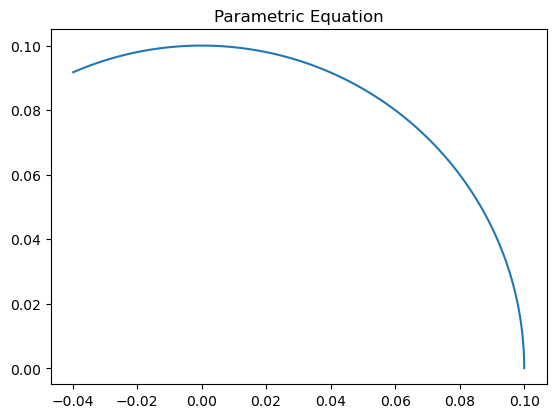

In [3]:
radius = 0.1
x = radius * np.cos(theta1)
y = radius * np.sin(theta1)
 
figure, axes = plt.subplots( 1 )
 
axes.plot( x, y )
axes.set_aspect( 1 )
 
plt.title( 'Parametric Equation' )
plt.show()

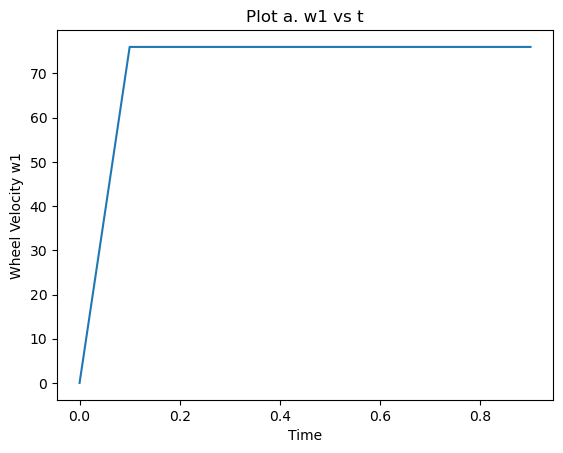

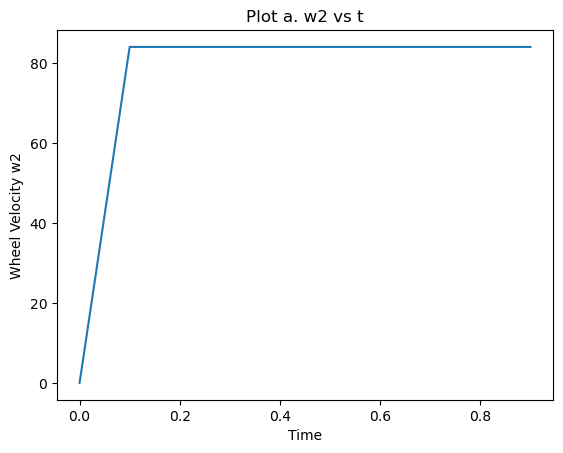

In [29]:
"""
a. Find the wheel velocities from the robot motion, and plot ω 1 vs t and ω 2 vs t.
"""

t = np.arange(0, 1, 0.1)
wheel_diameter = 0.25
wheel_velocities_1= []
count = 0
for t1 in t:
    wheel_velocity_1 = angular_velocities_1[count] #wheel velocities with no acceleration
    wheel_velocities_1.append(wheel_velocity_1)
    count = count+1
plt.plot(t, wheel_velocities_1)
plt.title("Plot a. w1 vs t")
plt.ylabel("Wheel Velocity w1")
plt.xlabel("Time")
plt.show()

t = np.arange(0, 1, 0.1)
wheel_diameter = 0.25
wheel_velocities_2= []
count = 0
for t1 in t:
    wheel_velocity_2 = angular_velocities_2[count]
    wheel_velocities_2.append(wheel_velocity_2)
    count = count+1
plt.plot(t, wheel_velocities_2)
plt.title("Plot a. w2 vs t")
plt.ylabel("Wheel Velocity w2")
plt.xlabel("Time")
plt.show()

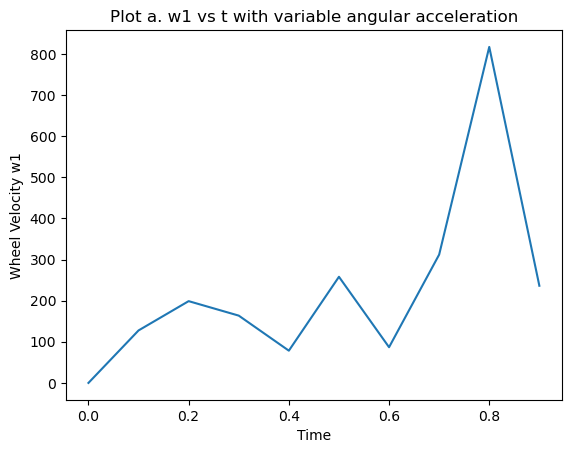

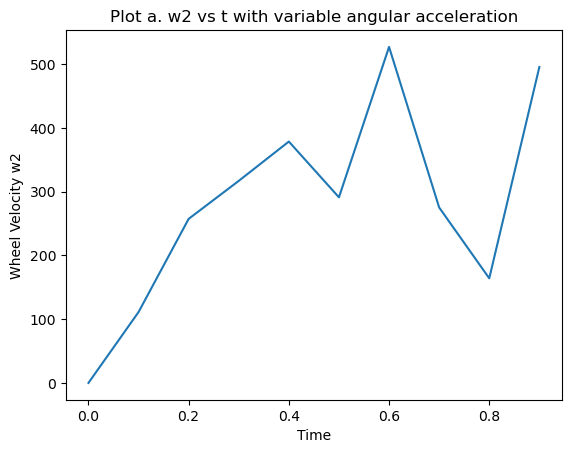

In [5]:
t = np.arange(0, 1, 0.1)
wheel_diameter = 0.25
wheel_velocities_1= []
count = 0
for t1 in t:
    angular_acceleration = randint(0,1000)
    wheel_velocity_1 = angular_velocities_1[count] + angular_acceleration*t1 
    wheel_velocities_1.append(wheel_velocity_1) # wheel velocities with variable angular acceleration 
    count = count+1
plt.plot(t, wheel_velocities_1)
plt.title("Plot a. w1 vs t with variable angular acceleration")
plt.ylabel("Wheel Velocity w1")
plt.xlabel("Time")
plt.show()

t = np.arange(0, 1, 0.1)
wheel_diameter = 0.25
wheel_velocities_2= []
angular_acceleration = np.arange(0, 1, 0.1)
count = 0
for t1 in t:
    angular_acceleration = randint(0,1000)
    wheel_velocity_2 = angular_velocities_2[count] + angular_acceleration*t1
    wheel_velocities_2.append(wheel_velocity_2)
    count = count+1
plt.plot(t, wheel_velocities_2)
plt.title("Plot a. w2 vs t with variable angular acceleration")
plt.ylabel("Wheel Velocity w2")
plt.xlabel("Time")
plt.show()

In [23]:
"""
b. Take random 50 samples of a normal distribution (for every iteration), where
mean µ is the wheel velocity (ω i , i = 1,2) and standard deviation is σ = l R /10 for
one iteration. Plot the probability distribution of these 50 sample data for the first
iteration.
"""
wheel_velocity_1 = wheel_velocities_1[1] # for first iteration
wheel_velocity_2 = wheel_velocities_2[1]
#mean = (wheel_velocity_1 + wheel_velocity_2)/2
mean_1 = wheel_velocity_1
mean_2 = wheel_velocity_2
std_dev = (wheels_distance)/10

sigma = std_dev # mean and standard deviation
samples_1 = np.random.normal(mean_1, sigma, 50)# random 50 samples of normal distribution
samples_2 = np.random.normal(mean_2, sigma, 50)

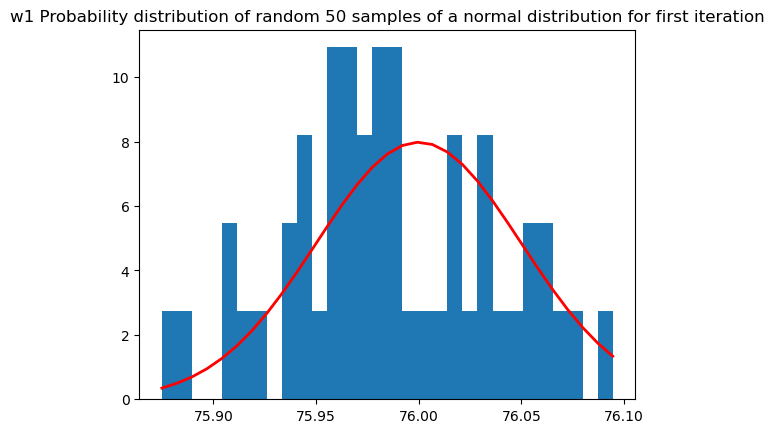

In [24]:
# Probability Distribution
import matplotlib.pyplot as plt
mu = mean_1
count, bins, ignored = plt.hist(samples_1, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title("w1 Probability distribution of random 50 samples of a normal distribution for first iteration")
plt.show()

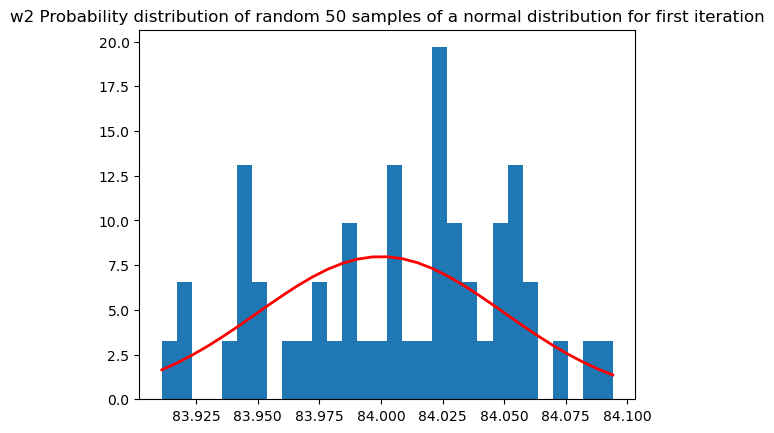

In [25]:
# Probability Distribution
import matplotlib.pyplot as plt
mu = mean_2
count, bins, ignored = plt.hist(samples_2, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title("w2 Probability distribution of random 50 samples of a normal distribution for first iteration")
plt.show()

In [30]:
#10 iterations: list of all wheel velocities
temp_wheel_velocities_1 = wheel_velocities_1.copy()
temp_wheel_velocities_2 = wheel_velocities_2.copy()
noise_wheel_velocities_1 = []
noise_wheel_velocities_2 = []
for i in range(0,10):
    wheel_velocity_1 = wheel_velocities_1[i] # for first iteration
    wheel_velocity_2 = wheel_velocities_2[i]
    mean_1 = wheel_velocity_1
    mean_2 = wheel_velocity_2
    std_dev = (wheels_distance)/10

    sigma = std_dev # mean and standard deviation
    samples_1 = np.random.normal(mean_1, sigma, 50)# random 50 samples of normal distribution
    samples_2 = np.random.normal(mean_2, sigma, 50)
    noise_wheel_velocities_1.extend(samples_1) 
    noise_wheel_velocities_2.extend(samples_2)

temp_wheel_velocities_1.extend(noise_wheel_velocities_1) 
temp_wheel_velocities_2.extend(noise_wheel_velocities_2)

#after appending we get a list of wheel velocities with noise from samples, 
#and we need to plot x,y coordinates from these wheel velocities as scatter plot along path of robot

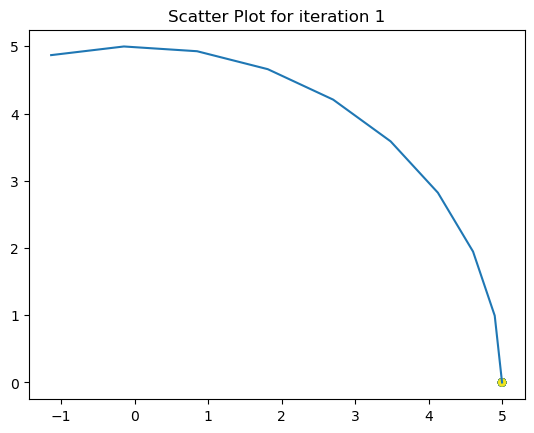

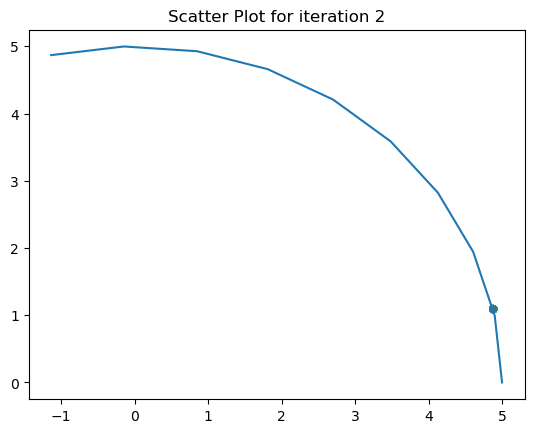

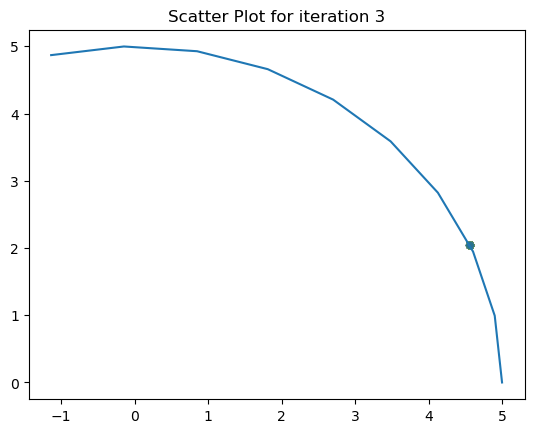

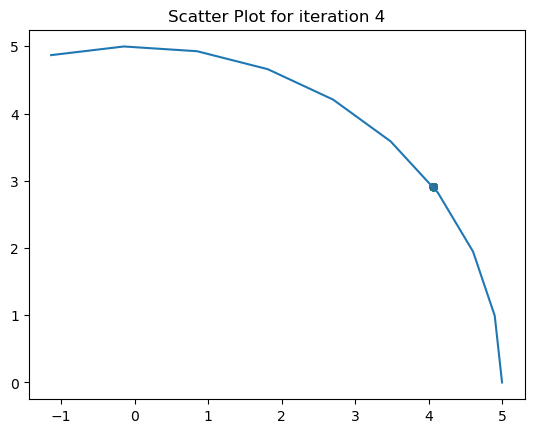

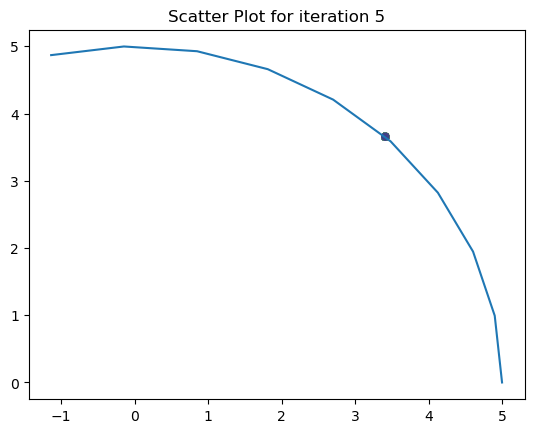

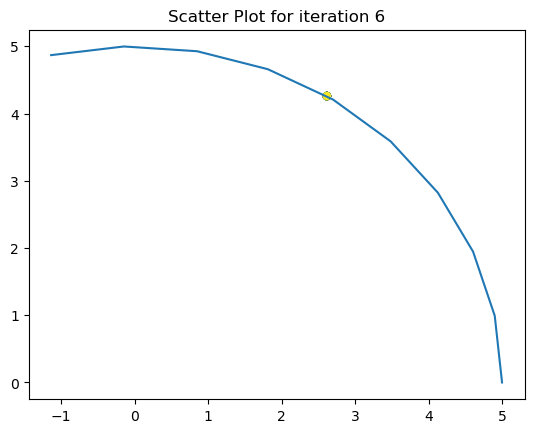

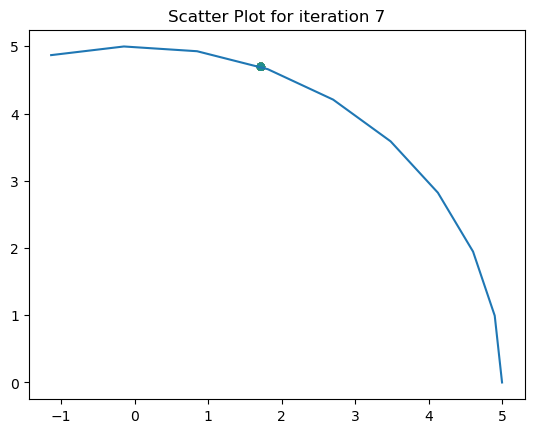

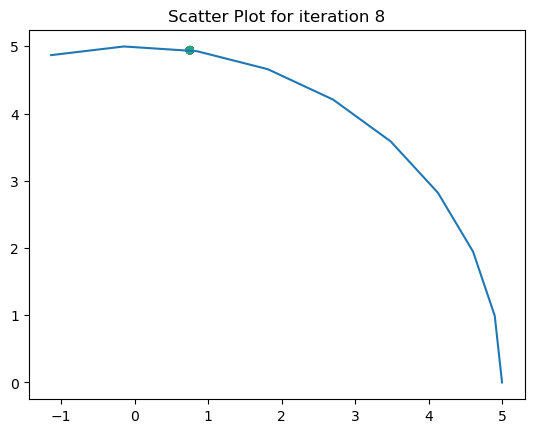

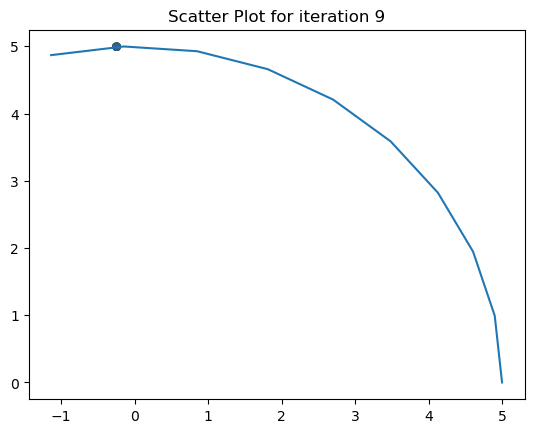

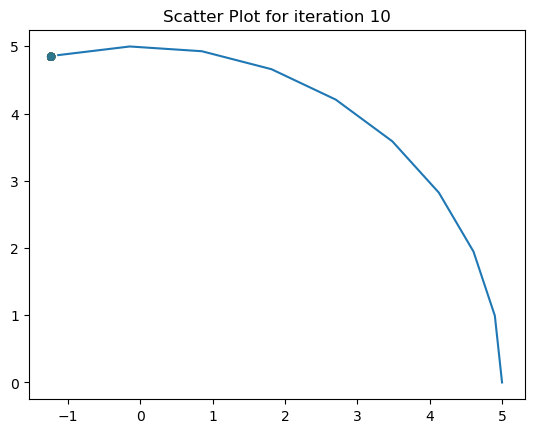

In [73]:
"""
c. Due to the randomness (normal distribution) of the wheel rotation all 50
instances will not reach at the same pose.
Make a scatter plot all these instances after 10 iterations (Only dots for the
position of the robot, circle and line are not necessary). Also, show the path for
reference.
"""
t1 = np.arange(0, 1, 0.1)
theta1 = (2 * t1)
t=0.01
radius = 5
wheels_distance = 0.5 # distance between two wheels of a differential drive robot
wheel_diameter = 0.25 # wheels_distance/2

for i in range(0,10):
    wheel_velocity_1 = wheel_velocities_1[i] # for first iteration
    wheel_velocity_2 = wheel_velocities_2[i]
    mean_1 = wheel_velocity_1
    mean_2 = wheel_velocity_2
    std_dev = (wheels_distance)/10

    sigma = std_dev # mean and standard deviation
    samples_1 = np.random.normal(mean_1, sigma, 50)# random 50 samples of normal distribution
    samples_2 = np.random.normal(mean_2, sigma, 50)
    
    theta_change_list = []
    for sample in samples_1:
        velocity_1 = sample*(wheel_diameter/2)
        rate_of_rotation = velocity_1/(radius-(wheels_distance/2))
        theta_change = rate_of_rotation*t
        theta_change_list.append(theta_change)
    #print(theta_change_list)
    theta_past=0
    x_total = []
    y_total = []
    for theta in theta_change_list:
        x1 = radius * np.cos(theta1[i]+theta)
        y1 = radius * np.sin(theta1[i]+theta)
        x_total.append(x1)
        y_total.append(y1)
    N = 50
    colors = np.random.rand(N)

    plt.scatter(x_total, y_total, c=colors, s=25)
    x = radius * np.cos(theta1)
    y = radius * np.sin(theta1)
    plt.plot(x,y)
    
    
    #t1 = np.arange(0, 1, 0.1)
    #arr = wheel_velocities_1
    #for j in range(10):
    #    arr[j] = arr[j]/100*random.random()
    #plt.plot(arr, t1)
    plt.title("Scatter Plot for iteration "+str(i+1))
    plt.show()

Moviepy - Building video simulation_video.mp4.
Moviepy - Writing video simulation_video.mp4



Moviepy - Done !
Moviepy - video ready simulation_video.mp4


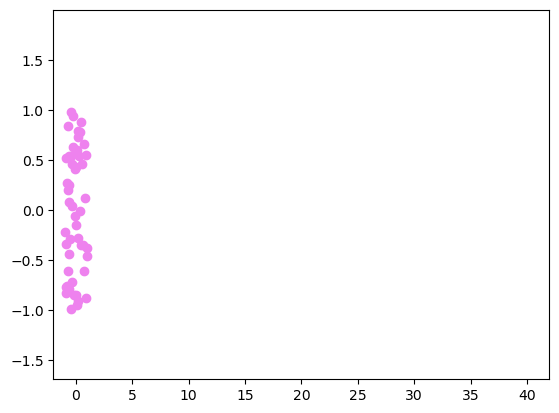

In [9]:
"""
d. Generate a simulation of this scatter samples starting from the initial pose at t 0
and gradually moving along the given trajectory.
"""

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import itertools

np.random.seed(42)
frames = 40

x = np.arange(frames)
y = np.sin(x/10)
colors = itertools.cycle(['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
data = [(np.random.uniform(-1, 1, 50) + x[i],
         np.random.uniform(-1, 1, 50) + y[i])
        for i in range(frames)]

fig, ax = plt.subplots()

s = ax.scatter([], [])

ax.set_xlim(-2, frames+2)
ax.set_ylim(min(y) - 1, max(y) + 1)

def update(i):
    s.set_offsets(np.column_stack([data[i][0], data[i][1]]))
    s.set_facecolor(next(colors))

ani = animation.FuncAnimation(fig, update, frames=frames, interval=100)
ani.save('simulation.gif', writer='pillow')

clip = mp.VideoFileClip('simulation.gif')
clip.write_videofile("simulation_video.mp4")